In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri
import scipy as sp
from scipy import optimize

In [78]:
r_1 = np.array([1,1,1])
r_2 = np.array([-1,-1,1])
r_3 = np.array([-1,1,-1])
r_4 = np.array([1,-1,-1])
t = np.array([2,2.25, 1.7, 1.5])

A = np.vstack((r_1, r_2, r_3, r_4))
B = np.ndarray((4,4))
B[:,:-1] = A
B[:,-1] = t
A = B

In [79]:
def jacf(x, t):
    return np.transpose(2 * np.array([x[0] - A[:,0], x[1] - A[:,1], x[2] - A[:,2], - (t - A[:,3]) ]))

In [83]:
def f(x, t):
    B = np.array([x[0] - A[:,0], x[1] - A[:,1], x[2] - A[:,2],  (t - A[:,3]) ])**2
    B[-1,:] *=-1
    return np.sum(B, axis = 0)

In [84]:
f([0.204,0.0518, -0.469], 0.078333)

array([-0.00214382, -0.00227732,  0.00085638,  0.00072318])

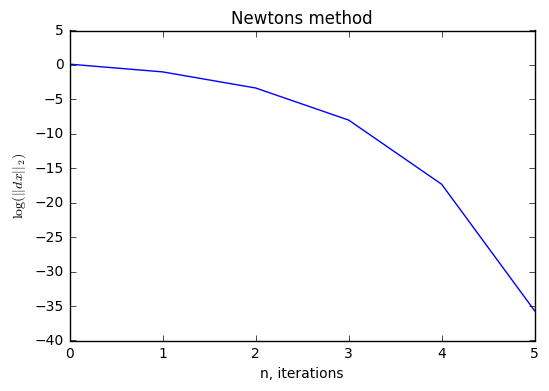

In [97]:
x = np.array([0.5, 0.5, 0.5, 0.0], dtype='float64')
error = []
err = 1
while( err > 10e-15):
    dx = np.linalg.solve(jacf(x[:-1], x[-1]), f(x[:-1], x[-1]))
    x -= dx
    err = np.linalg.norm(dx,2)
    error.append(np.log(err))  
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('n, iterations')
ax.set_ylabel('$\log(||dx||_2)$')
plt.title('Newton''s method')
plt.plot(error)
plt.show()